In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   sklearn.cluster import KMeans

%matplotlib inline

In [2]:
K = 5
N_PER = 100

In [3]:
def generate_random_params(k):
    HIGH = 10
    SD = 1
    params = [
        {'x': np.random.uniform(high=HIGH),
         'y': np.random.uniform(high=HIGH),
         'sd': np.abs(np.random.normal(scale=SD))}
        for _ in range(k)]
    return params
    
# Test:
params = generate_random_params(K)
params

[{'x': 6.261627213873577, 'y': 9.671945147670394, 'sd': 0.5487825555501881},
 {'x': 6.568022123950891, 'y': 2.7679308941223555, 'sd': 0.2508391601560818},
 {'x': 6.766843316035901, 'y': 1.9058669872754808, 'sd': 0.4605760762747738},
 {'x': 7.456887153750097, 'y': 8.570112007613801, 'sd': 0.1315752045434316},
 {'x': 0.4308933897499334, 'y': 1.750948011576594, 'sd': 1.0061711638624373}]

In [4]:
def rand_color():
    digits = list('0123455679ABCDEF')
    return '#' + ''.join(np.random.choice(digits, size=6, replace=True))

rand_color()

'#5B21C5'

In [5]:
def make_clusters(params, n_per):
    clusters = []
    for k, p in enumerate(params):
        col = rand_color()
        df = pd.DataFrame(
            {'x': np.random.normal(p['x'], scale=p['sd'], size=n_per),
             'y': np.random.normal(p['y'], scale=p['sd'], size=n_per),
             'k': [k] * n_per,
             'color': col})
        clusters.append(df)
    out = pd.concat(clusters)
    out.index = range(out.shape[0])
    return out

In [6]:
clust = make_clusters(generate_random_params(K), N_PER)
clust.head()

,x,y,k,color
0,9.758302,6.272005,0,#FCB0D4
1,9.936940,6.340704,0,#FCB0D4
2,9.733977,6.291003,0,#FCB0D4
3,9.924516,6.106832,0,#FCB0D4
4,9.418451,6.415068,0,#FCB0D4


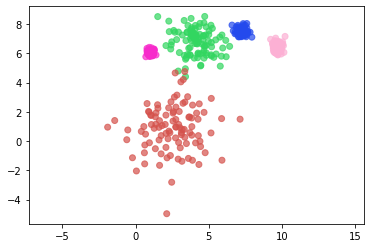

In [7]:
plt.scatter(clust.x, clust.y, color=clust.color, alpha=0.7)
plt.axis('equal');

In [39]:
def init_centroids(clust, k, method):
    '''
    method: 'random' or 'data'
    '''
    if method == 'random':
        x_min, x_max = clust.x.min(), clust.x.max()
        y_min, y_max = clust.y.min(), clust.y.max()
        centroids = [[np.random.uniform(x_min, x_max), 
                      np.random.uniform(y_min, y_max)] 
                     for _ in range(k)]
        return np.array(centroids)
    else:
        i = np.random.choice(clust.index, size=k, replace=False)
        return clust[['x', 'y']].iloc[i].values
    
# Test
#METHOD = 'random' 
METHOD = 'data'
centroids = init_centroids(clust, K, METHOD)
centroids

array([[4.34993142, 2.54298925],
       [4.38839666, 7.2949867 ],
       [5.1519091 , 7.91794555],
       [5.95662322, 6.35936889],
       [7.34494494, 7.54762776]])

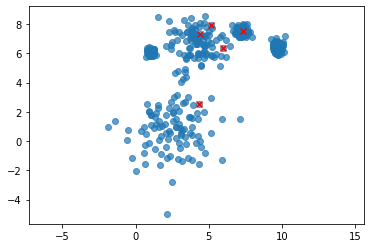

In [40]:
plt.scatter(clust.x, clust.y, alpha=0.7);
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
plt.axis('equal');

In [41]:
def get_dist(p1, p2):
    return np.sqrt(((p1 - p2)**2).sum())

# Test
origin = np.array([0, 0])
a = np.array([3, 4])
b = np.array([4, 3])
get_dist(a, origin), get_dist(origin, b), get_dist(a, b), np.sqrt(2)

(5.0, 5.0, 1.4142135623730951, 1.4142135623730951)

In [42]:
def assign_points_to_centroids(centroids, clust):
    for i, c in enumerate(centroids):
        clust[f'centroid_{i}'] = clust.apply(
            lambda row: get_dist(np.array([row.x, row.y]), c), 
            axis=1)
    clust['assignment'] = clust[
        [f'centroid_{c}' for c in range(len(centroids))]
    ].apply(lambda row: np.argmin(row), axis=1)
    colors = [rand_color() for _ in centroids]
    clust.color = clust.assignment.apply(lambda x: colors[x])
    return clust

# Test
clust = assign_points_to_centroids(centroids, clust)

In [43]:
def clust_plot(centroids, clust):
    plt.scatter(clust.x, clust.y, color=clust.color, alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
    plt.axis('equal')

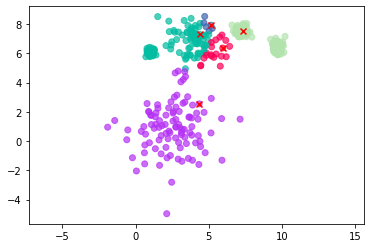

In [44]:
clust_plot(centroids, clust)

In [45]:
def update_centroids(centroids, clust, method='random'):
    updated = []
    for i, c in enumerate(centroids):
        sub = clust.loc[clust.assignment == i, ['x', 'y']]
        if sub.shape[0]:
            c = sub.mean().values
        else:
            # if no points assigned to 
            c = init_centroids(clust, 1, method)[0]
        updated.append(c)
    return np.array(updated)

# Test
centroids = update_centroids(centroids, clust, METHOD)

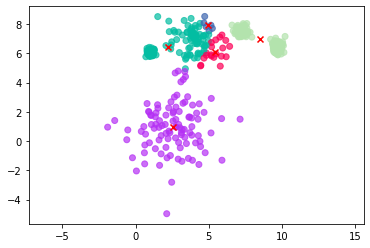

In [46]:
clust_plot(centroids, clust)

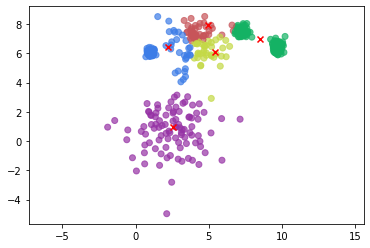

In [47]:
clust = assign_points_to_centroids(centroids, clust)
clust_plot(centroids, clust)

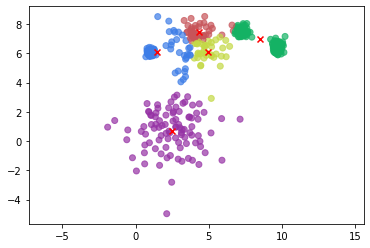

In [48]:
centroids = update_centroids(centroids, clust, METHOD)
clust_plot(centroids, clust)

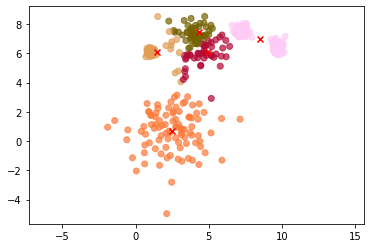

In [49]:
clust = assign_points_to_centroids(centroids, clust)
clust_plot(centroids, clust)

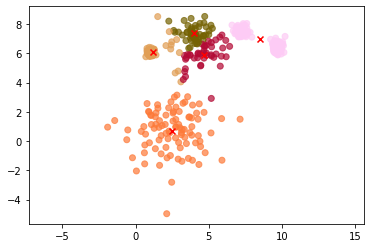

In [50]:
centroids = update_centroids(centroids, clust, METHOD)
clust_plot(centroids, clust)

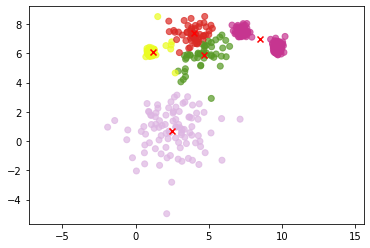

In [51]:
clust = assign_points_to_centroids(centroids, clust)
clust_plot(centroids, clust)

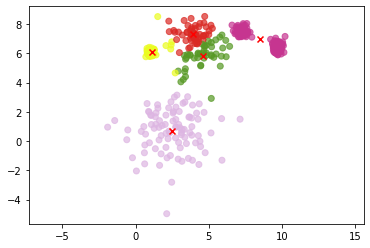

In [52]:
centroids = update_centroids(centroids, clust, METHOD)
clust_plot(centroids, clust)

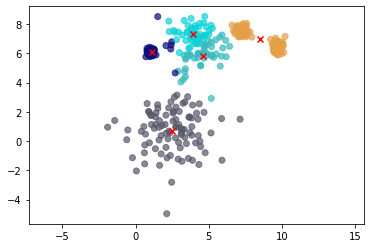

In [53]:
clust = assign_points_to_centroids(centroids, clust)
clust_plot(centroids, clust)

### `sklearn` Implementation

- `init` defaults to `'k-means++'` intelligent initialization, but can also be 'random'
- `n_init` is the number of intializations it will use, and will return the cluster assignment from the best run. 
- BONUS: without peeking, how might we decide the "best" run? (We'll return to this later.)

In [54]:
X = clust[['x', 'y']]
kmeans = KMeans(n_clusters=K, init='k-means++', n_init=30)
kmeans.fit(X)
clust['km'] = kmeans.predict(X)

In [55]:
clust.head()

,x,y,k,color,centroid_0,centroid_1,centroid_2,centroid_3,centroid_4,assignment,km
0,9.758302,6.272005,0,#E5A047,9.178078,8.654651,5.911373,5.145944,1.439386,4,3
1,9.936940,6.340704,0,#E5A047,9.361753,8.835076,6.075484,5.330282,1.570629,4,3
2,9.733977,6.291003,0,#E5A047,9.170409,8.630797,5.884034,5.123465,1.408964,4,3
3,9.924516,6.106832,0,#E5A047,9.212202,8.818595,6.106126,5.299714,1.665460,4,3
4,9.418451,6.415068,0,#E5A047,9.001419,8.319592,5.551838,4.823396,1.072978,4,3


In [56]:
color_map = {k: rand_color() for k in range(K)}
color_map

{0: '#5622D9', 1: '#4B9DEE', 2: '#4CDD01', 3: '#3E44EB', 4: '#414455'}

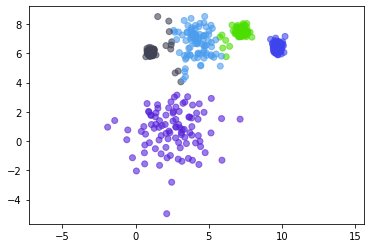

In [57]:
plt.scatter(clust.x, 
            clust.y, 
            color=clust.km.apply(lambda k: color_map[k]), 
            alpha=0.6)
plt.axis('equal');